In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv


# Loading the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
#Number of unique values
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

# Checking for missing values

In [6]:
df.isnull().sum()/len(df)*100

Unnamed: 0                  0.000000
Clothing ID                 0.000000
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64

We won't be using Title feature since it has a lot of missing values.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


In [8]:
df.drop(['Clothing ID', 'Title', 'Unnamed: 0'], axis = 1, inplace = True)

We are dropping these features because they hold very less significance to sentiment analysis of the review.

In [9]:
df[df['Review Text'].isnull()]

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,23,NaN,5,1,0,General Petite,Tops,Knits
93,31,NaN,5,1,0,General,Dresses,Dresses
98,50,NaN,5,1,0,General,Jackets,Outerwear
135,35,NaN,4,1,0,General Petite,Tops,Knits
142,35,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...
23258,35,NaN,4,1,0,General,Tops,Knits
23301,52,NaN,5,1,0,General,Tops,Knits
23303,46,NaN,5,1,0,General,Tops,Blouses
23470,39,NaN,5,1,0,General Petite,Dresses,Dresses


Removing the unwanted null values.

In [10]:
df = df[~df['Review Text'].isnull()]

In [11]:
df.shape

(22641, 8)

# Data Analysis and Visualization

In [12]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


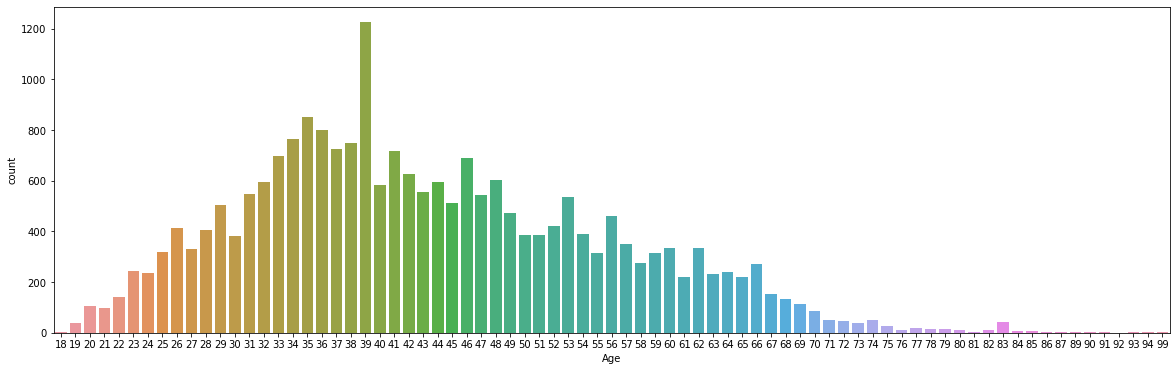

In [13]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Age', data = df)
plt.show()

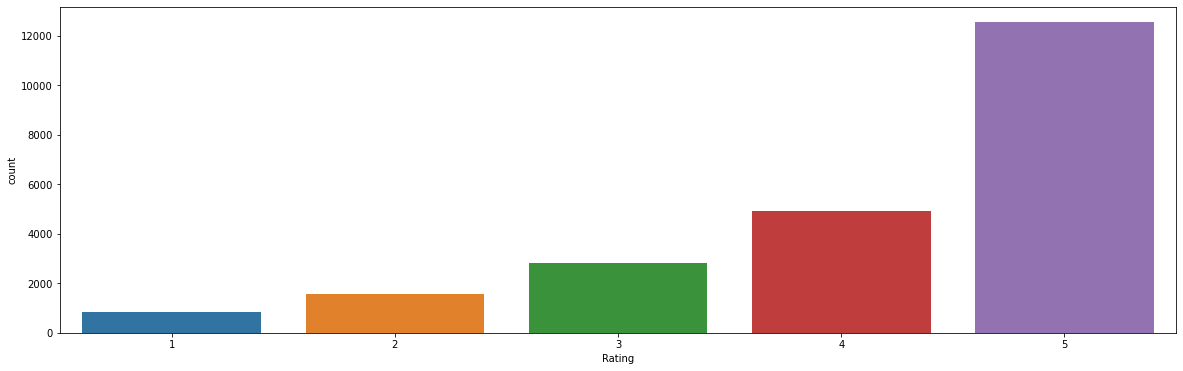

In [14]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Rating', data = df)
plt.show()

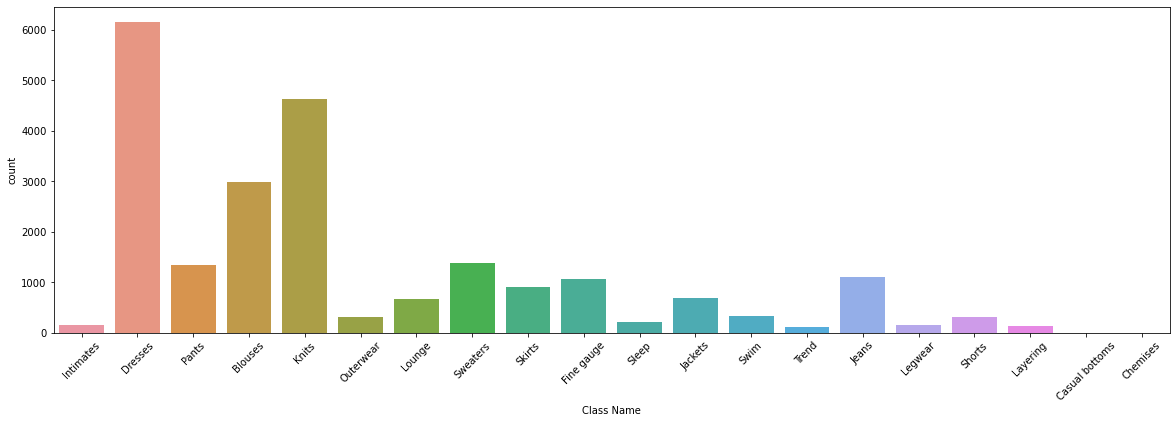

In [15]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Class Name', data = df)
plt.xticks(rotation = 45)
plt.show()

Dresses, Knits and Blouses are bought the most by women. 

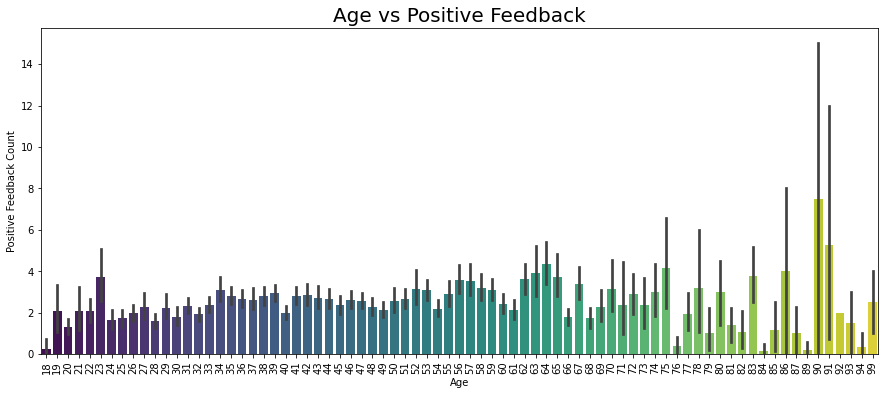

In [16]:
plt.figure(figsize = (15,6))
sns.barplot(x ='Age',y= 'Positive Feedback Count',data = df, palette = 'viridis')
plt.title('Age vs Positive Feedback', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

There's no noteable relation between Age and Positive Feedback, excluding some outliers.  



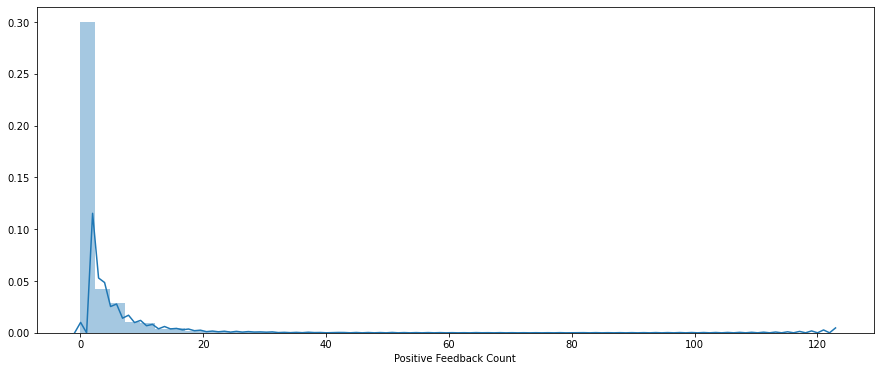

In [17]:
plt.figure(figsize = (15,6))
sns.distplot(df['Positive Feedback Count'])
plt.show()

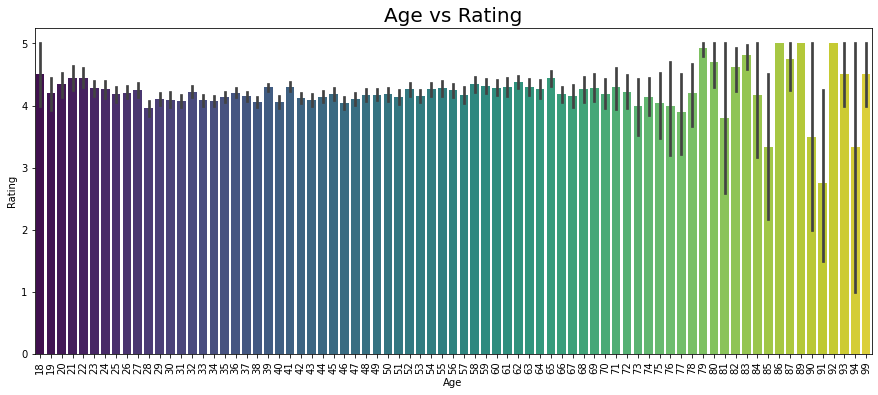

In [18]:
plt.figure(figsize = (15,6))

sns.barplot(x ='Age',y= 'Rating',data = df, palette = 'viridis')
plt.title('Age vs Rating', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

There's no noteable relation between Age and Rating, excluding some outliers. Same as Age vs Positive Feedback.

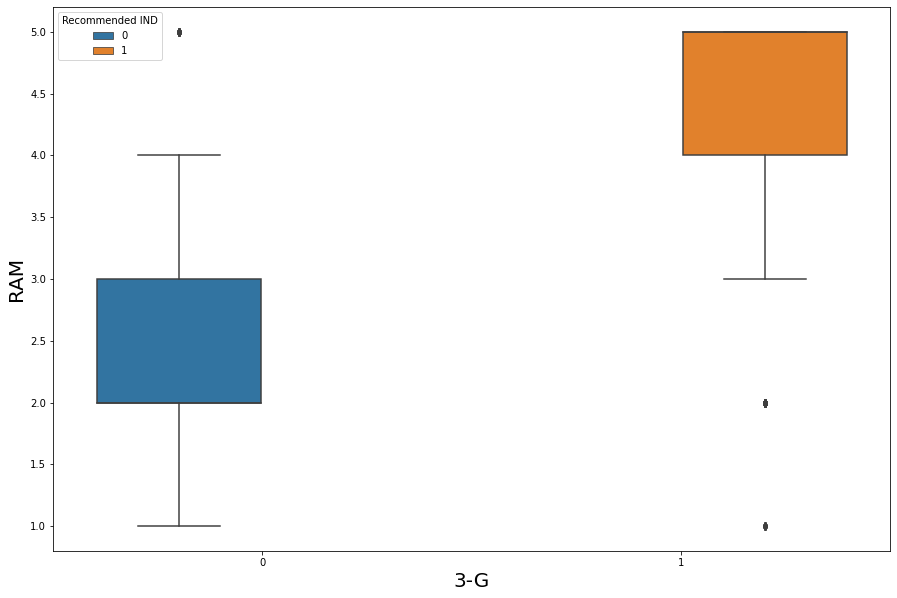

In [19]:
plt.figure(figsize = (15,10))
sns.boxplot(x="Recommended IND", y="Rating", hue = "Recommended IND", data = df)
plt.xlabel("3-G", fontsize = 20)
plt.ylabel("RAM", fontsize = 20)

plt.show()

Here 1 means recommended. 0 means not recommended.

Women recommend a product if they rate it to be more than or equal to 3.

# Cleaning the text for visualization of polarity

Removing all the punctuations from the review text.

In [20]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['Review Text']=df['Review Text'].apply(lambda x: remove_punctuation(x))
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [21]:
!pip install TextBlob
from textblob import *

df['polarity'] = df['Review Text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['polarity']

0        0.633333
1        0.318750
2        0.076392
3        0.500000
4        0.393750
           ...   
23481    0.512667
23482    0.091667
23483    0.414286
23484    0.316667
23485    0.364444
Name: polarity, Length: 22641, dtype: float64

In [22]:
import plotly.express as px
px.histogram(df, x = 'polarity',color="Rating", opacity = 0.5)

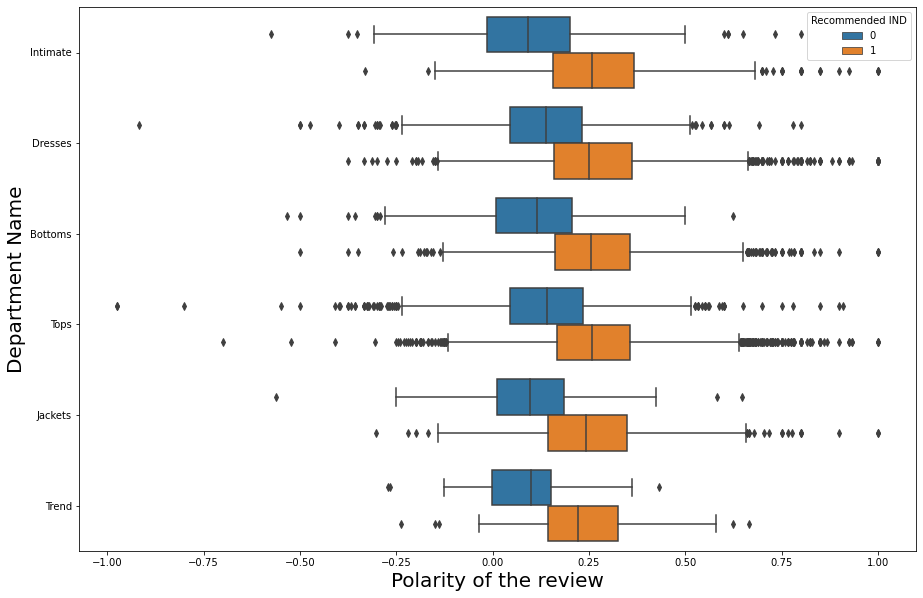

In [23]:
plt.figure(figsize = (15,10))
sns.boxplot(x="polarity", y="Department Name", hue = "Recommended IND", data = df)
plt.xlabel("Polarity of the review", fontsize = 20)
plt.ylabel("Department Name", fontsize = 20)

plt.show()

This plot looks right because all **the polarities of "not recommended" are less than that of polarities of the "recommended".**

# Reviews with positive polarity

In [24]:
example = df.loc[df.polarity == 1,['Review Text']].sample(3).values
for i in example:
    print(i[0])

The print is awesome 
My daughter had one and wore it with everythingi ended up getting one myselfit is a perfect weight
The details and colors are exquisite stop hesitating and get this dress


# Reviews with neutral polarity

In [25]:
example = df.loc[df.polarity == 0.5,['Review Text']].sample(3).values
for i in example:
    print(i[0])

I ordered two colors of these in 25p  i am keeping them because they feel wonderful on but they definitely have to be hemmed i measured the inseam on both pairs to be closer to 29 inches  29 inches is not a petite length
The pattern of this skirt is adorable and looks better in person but the fabric isnt the best it feels like an elastic fabric and is way to volumous overall not my favorite
Love love love this blouse the cut outs at the top just add to its elegance


# Reviews with negative polarity

In [26]:
example = df.loc[df.polarity < 0,['Review Text']].sample(3).values
for i in example:
    print(i[0])

This is a gorgeous blouse the quality is on point i was so disappointed because i had to return it
the blouse was just a few inches too tight across the bust
Beautiful shape and colors but the fabric felt heavier than i imagined sort of like heavy drapes also the length as others mentioned was too long i am not normally a petite but the regular was too long unfortunately it has to go back
A flattering soft basic im 52 120 lbs and purchased the small on sale


# Polarity Pie-Chart

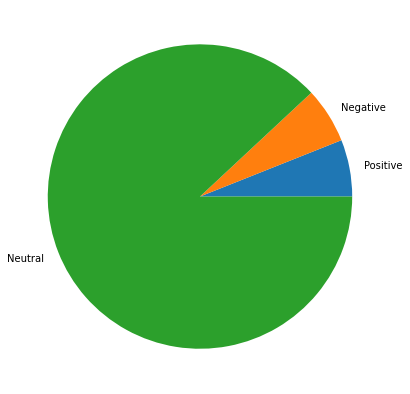

In [27]:
negative = (len(df.loc[df.polarity < 0, ['Review Text']].values)/len(df))*100
positive = (len(df.loc[df.polarity > 0.5, ['Review Text']].values)/len(df))*100
neutral = len(df.loc[df.polarity >0 ,['Review Text']].values) - len(df.loc[df.polarity >0.5 ,['Review Text']].values)
neutral = neutral/len(df)*100
plt.figure(figsize =(10, 7)) 
plt.pie([positive,negative,neutral], labels = ['Positive','Negative','Neutral']) 
plt.show()

# Create N-grams

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus) #Have the count of  all the words for each review
    sum_words = bag_of_words.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

# Visualizing Top 10 Unigrams

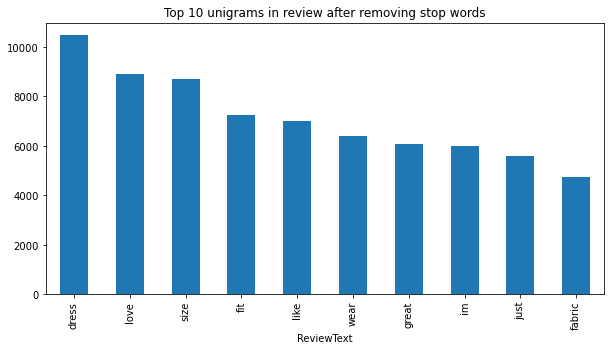

In [29]:
common_words= top_n_ngram(df['Review Text'], 10,1)
data = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(10,5))
data.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 10 unigrams in review after removing stop words')

# Visualizing Top 20 Bigrams

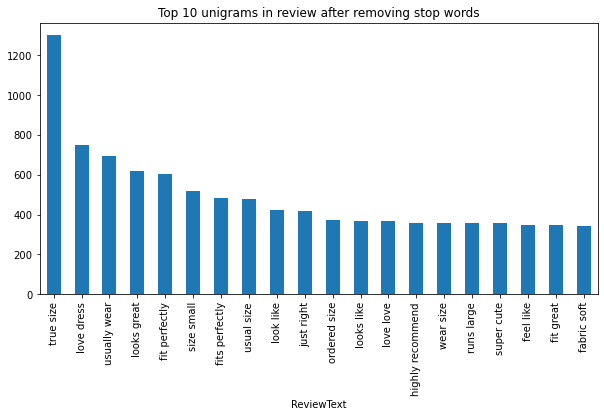

In [30]:
common_words = top_n_ngram(df['Review Text'], 20,2)
data = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(10,5))
data.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 10 unigrams in review after removing stop words')

# Visualizing Top 10 POS Tagging

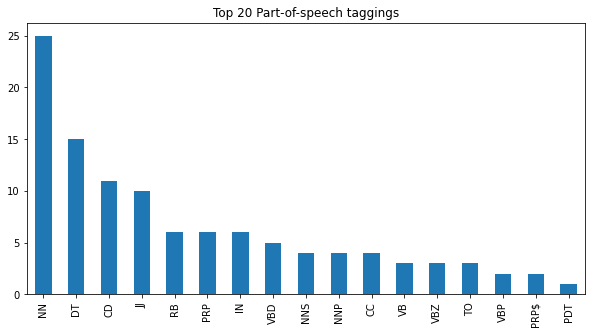

In [31]:
blob= TextBlob(str(df['Review Text']))
pos = pd.DataFrame(blob.tags,columns =['word','pos'])
pos1 = pos.pos.value_counts()[:20]
plt.figure(figsize = (10,5))
pos1.plot(kind='bar',title ='Top 20 Part-of-speech taggings')


# Correlation of fetaures using Heatmaps 

Adding Review Length as a feature

In [32]:
df['review_len'] = df['Review Text'].astype(str).apply(len)

In [33]:
y = df['Recommended IND']
X = df.drop(columns = 'Recommended IND')

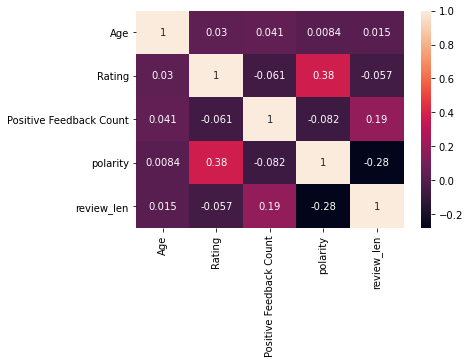

In [34]:
sns.heatmap(X.corr(), annot = True )

There's not a strong correleation between any of the features.

# Statistical Description

In [35]:
class1 = []
for i in X.polarity:
    if float(i)>=0.0:
        class1.append(1)
        
    elif float(i)<0.0:
        class1.append(0)
X['sentiment'] = class1

X.groupby(X['sentiment']).describe().T

sentiment                                 0             1
Age                     count  1.333000e+03  21308.000000
                        mean   4.336234e+01     43.275249
                        std    1.208516e+01     12.342210
                        min    2.000000e+01     18.000000
                        25%    3.500000e+01     34.000000
                        50%    4.100000e+01     41.000000
                        75%    5.100000e+01     52.000000
                        max    9.400000e+01     99.000000
Rating                  count  1.333000e+03  21308.000000
                        mean   2.957989e+00      4.260231
                        std    1.355571e+00      1.052657
                        min    1.000000e+00      1.000000
                        25%    2.000000e+00      4.000000
                        50%    3.000000e+00      5.000000
                        75%    4.000000e+00      5.000000
                        max    5.000000e+00      5.000000
Positive Feedback Count count  1.333000e+03  21308.000000
                        mean   3.159790e+00      2.597475
                        std    6.813857e+00      5.714293
                        min    0.000000e+00      0.000000
                        25%    0.000000e+00      0.000000
                        50%    1.000000e+00      1.000000
                        75%    3.000000e+00      3.000000
                        max    1.080000e+02    122.000000
polarity                count  1.333000e+03  21308.000000
                        mean  -9.206169e-02      0.262345
                        std    1.019496e-01      0.150223
                        min   -9.750000e-01      0.000000
                        25%   -1.233333e-01      0.154970
                        50%   -6.071429e-02      0.245000
                        75%   -2.687075e-02      0.349038
                        max   -1.734723e-18      1.000000
review_len              count  1.333000e+03  21308.000000
                        mean   2.878785e+02    299.257227
                        std    1.376986e+02    139.672532
                        min    1.000000e+01      9.000000
                        25%    1.710000e+02    180.000000
                        50%    2.760000e+02    293.000000
                        75%    4.150000e+02    445.000000
                        max    4.960000e+02    498.000000

# Creating Bag Of Words Model

In [36]:
print("Shape of X: " , X.shape)
print("Shape of y: " , y.shape)

Shape of X:  (22641, 10)
Shape of y:  (22641,)


In [37]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
X.index = np.arange(len(X))
corpus = []
from tqdm import tqdm
for i in tqdm(range(len(X))):
  review = re.sub('[^a-zA-Z]', ' ', X['Review Text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

100%|██████████| 22641/22641 [00:46<00:00, 490.34it/s]


In [39]:
corpus

['absolut wonder silki sexi comfort',
 'love dress sooo pretti happen find store im glad bc never would order onlin bc petit bought petit love length hit littl knee would definit true midi someon truli petit',
 'high hope dress realli want work initi order petit small usual size found outrag small small fact could not zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper c',
 'love love love jumpsuit fun flirti fabul everi time wear get noth great compliment',
 'shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt',
 'love traci rees dress one not petit feet tall usual wear p brand dress pretti packag lot dress skirt long full overwhelm small frame not stranger alter shorten narrow skirt would take away embellish garment love color idea style not work return dress',
 'ade basket hte last mintu see would look like person store 

In [40]:
# from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
# wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1000, height = 1500)
# wc.generate(review)
# plt.figure(figsize=[10,10])
# plt.imshow(wc,interpolation="bilinear")
# plt.axis('off')
# plt.show()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer as CV
cv  = CV(max_features = 3000,ngram_range=(1,1))
X_cv = cv.fit_transform(corpus).toarray()
y = y.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size = 0.20, random_state = 0)
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn import metrics
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the classifier: ",acc)
print("Confusion matrix is :\n",metrics.confusion_matrix(y_test,y_pred))
print("Classification report: \n" ,metrics.classification_report(y_test,y_pred))


Accuracy of the classifier:  0.8728196069772577
Confusion matrix is :
 [[ 631  246]
 [ 330 3322]]
Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       877
           1       0.93      0.91      0.92      3652

    accuracy                           0.87      4529
   macro avg       0.79      0.81      0.80      4529
weighted avg       0.88      0.87      0.87      4529



In [42]:
acc

0.8728196069772577

An accuracy score of 87.28% is pretty good.

# TF-IDF Technique

Term Frequency - Inverse Document Frequency is used to measure the originality of a word. It converts sentences to vectors(after tokenization, stemming/lemmatization). 

Bag of Words technique doesn't provide us with the semantic meaning of the word, here TF-IDF comes in play as it provides us the semantic meaning of the word.


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer as TV
tv  = TV(ngram_range =(1,1),max_features = 3000)
X_tv = tv.fit_transform(corpus).toarray()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_tv, y, test_size = 0.20, random_state = 0)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [45]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [46]:
acc

0.8355045263855155

An accuracy of 83.55% from the TF-IDF technique, which is less than that of Bag of Words Technique.

# Deep Learning Model

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [48]:
tokenizer = Tokenizer(num_words = 3000)
tokenizer.fit_on_texts(corpus)

In [49]:
sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences, padding='post')

In [50]:
word_index = tokenizer.word_index
count = 0
for i,j in word_index.items():
    if count == 11:
        break
    print(i,j)
    count = count+1

dress 1
love 2
fit 3
size 4
not 5
look 6
top 7
wear 8
like 9
color 10
great 11


These are the Top 11 most frequent words.

In [51]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(3000, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          192000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 192,397
Trainable params: 192,397
Non-trainable params: 0
_________________________________________________________________


In [52]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
model.fit(padded,y,epochs= num_epochs)

Epoch 1/10
708/708 [==============================] - 2s 3ms/step - loss: 0.3881 - accuracy: 0.8268
Epoch 2/10
708/708 [==============================] - 2s 3ms/step - loss: 0.2685 - accuracy: 0.8889
Epoch 3/10
708/708 [==============================] - 2s 3ms/step - loss: 0.2415 - accuracy: 0.9016
Epoch 4/10
708/708 [==============================] - 2s 3ms/step - loss: 0.2246 - accuracy: 0.9099
Epoch 5/10
708/708 [==============================] - 2s 3ms/step - loss: 0.2132 - accuracy: 0.9140
Epoch 6/10
708/708 [==============================] - 2s 3ms/step - loss: 0.2058 - accuracy: 0.9187
Epoch 7/10
708/708 [==============================] - 2s 3ms/step - loss: 0.1986 - accuracy: 0.9213
Epoch 8/10
708/708 [==============================] - 2s 3ms/step - loss: 0.1933 - accuracy: 0.9248
Epoch 9/10
708/708 [==============================] - 2s 3ms/step - loss: 0.1892 - accuracy: 0.9262
Epoch 10/10
708/708 [==============================] - 2s 3ms/step - loss: 0.1860 - accuracy: 0.9269

In [54]:
sample_string = "I Will tell my friends for sure"
sample = tokenizer.texts_to_sequences(sample_string)
padded_sample = pad_sequences(sample, padding='post')

In [55]:
padded_sample.T

array([[   0,    0,  649,    0,  350,  350,    0,    0, 1605,  350,  350,
           0,    0,    0,    0,  956, 1380,    0, 1605, 1465,    0,    0,
           0,  956,    0, 1380,    0,    0, 1899, 1380, 1605]],
      dtype=int32)

In [56]:
model.predict(padded_sample.T)

array([[0.99926025]], dtype=float32)

There's a 99.45% accuracy that this review will result in recommendation.